<a href="https://colab.research.google.com/github/AmirGhnbr/statistical_time_series_analysis/blob/main/statistical_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q seaborn arch yfinance scikit-learn pmdarima mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 6.6 MB/s eta 0:00:00


In [2]:
!pip install git+https://github.com/statsmodels/statsmodels

  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-regk2wiw
  Running command git clone --filter=blob:none --quiet https://github.com/statsmodels/statsmodels /tmp/pip-req-build-regk2wiw
  Resolved https://github.com/statsmodels/statsmodels to commit 3b61c469ed8d4a6752b5bf01390789512f81f0c6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for statsmodels: filename=statsmodels-0.15.0.dev44+g3b61c469e-cp310-cp310-linux_x86_64.whl size=23252515 sha256=cb22469e9814008fae61b60ba062a69277ee1187f7ab5d5973afd3e692d54ad4
  Stored in directory: /tmp/pip-ephem-wheel-cache-z5mp6sa1/wheels/80/42/7e/512a0e0b733106dec3d046d1f77208d4f64f601a266ad861dc
Successfully built statsmodels
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled s

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mplf
import matplotlib.pyplot as plt

In [4]:
data = yf.download('BTC-USD',
                   period='9mo',
                   interval='1d',
                   progress=False)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-05,20335.900391,20343.748047,19801.800781,20160.716797,20160.716797,33223790572
2022-10-06,20161.039062,20408.392578,19900.087891,19955.443359,19955.443359,34711412966
2022-10-07,19957.558594,20041.085938,19395.792969,19546.849609,19546.849609,29227315390
2022-10-08,19546.328125,19601.695312,19299.414062,19416.568359,19416.568359,16437423167
2022-10-09,19417.478516,19542.539062,19349.259766,19446.425781,19446.425781,16837262532
...,...,...,...,...,...,...
2023-07-01,30471.847656,30641.289062,30328.865234,30590.078125,30590.078125,9086606733
2023-07-02,30587.269531,30766.140625,30264.019531,30620.769531,30620.769531,10533418042
2023-07-03,30624.515625,31375.613281,30586.513672,31156.439453,31156.439453,15271884873


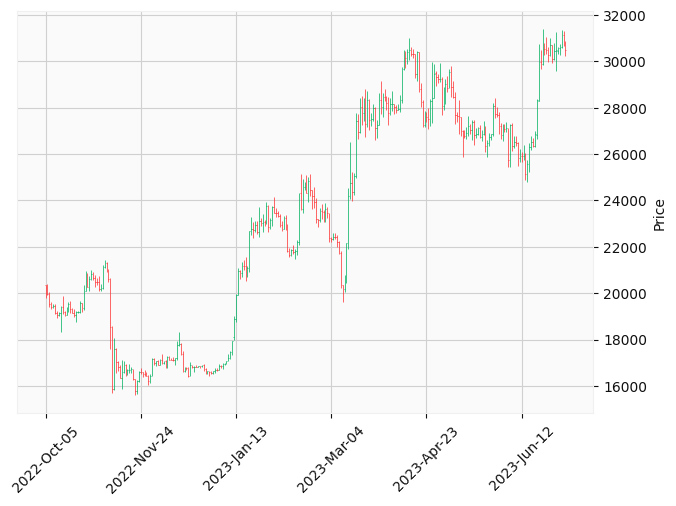

In [5]:
mplf.plot(data, style='yahoo',warn_too_much_data=10000)

### Trying to decompose the non-stationary btc data using stl

In [6]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

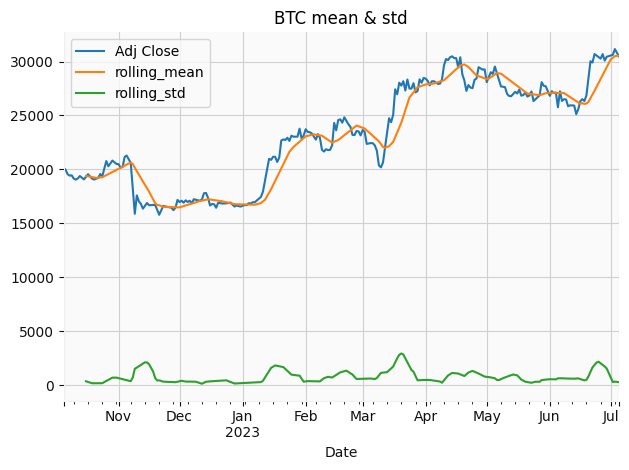

In [7]:
WINDOW_SIZE = 12
data["rolling_mean"] = data["Adj Close"].rolling(window=WINDOW_SIZE).mean()
data["rolling_std"] = data["Adj Close"].rolling(window=WINDOW_SIZE).std()
data[['Adj Close','rolling_mean','rolling_std']].plot(title="BTC mean & std")

sns.despine()
plt.tight_layout()

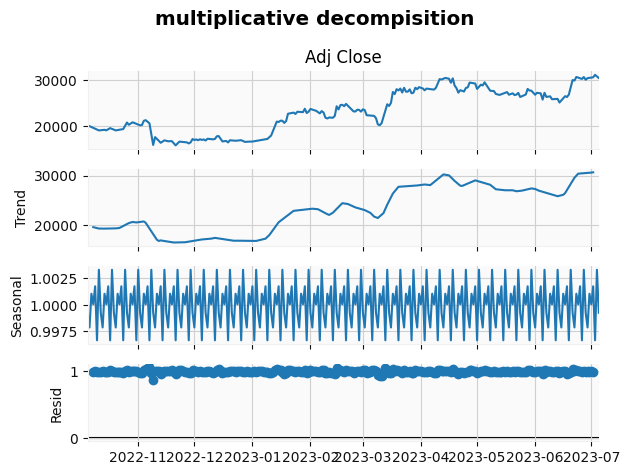

In [8]:
decomposition_res = seasonal_decompose(data['Adj Close'],model='multiplicative')

(
    decomposition_res
    .plot()
    .suptitle('multiplicative decompisition')
)
sns.despine()
plt.tight_layout()

### Let's do STL ans mstl decomposition

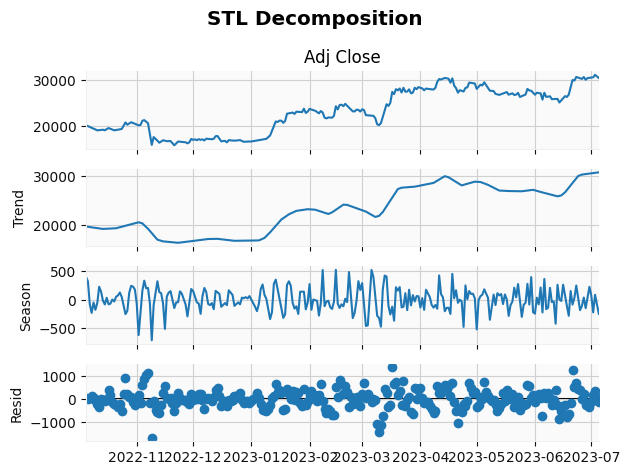

In [9]:
from statsmodels.tsa.seasonal import STL

stl_decomposition = STL(data["Adj Close"]).fit()
stl_decomposition.plot() \
                 .suptitle("STL Decomposition")

sns.despine()
plt.tight_layout()

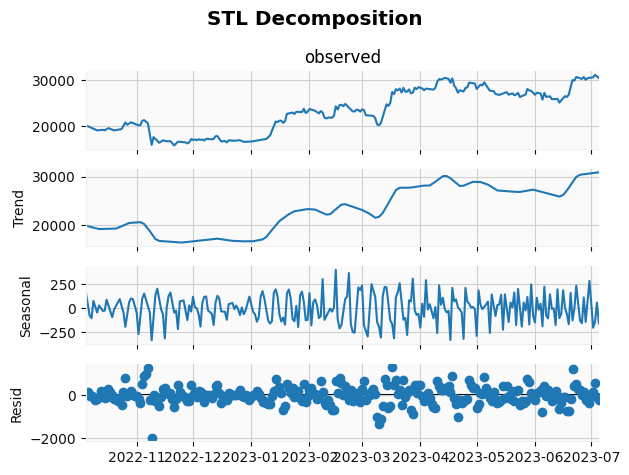

In [10]:
from statsmodels.tsa.seasonal import MSTL

stl_decomposition = MSTL(data["Adj Close"]).fit()
stl_decomposition.plot() \
                 .suptitle("STL Decomposition")

sns.despine()
plt.tight_layout()

## Apply hodrick-prescott filter

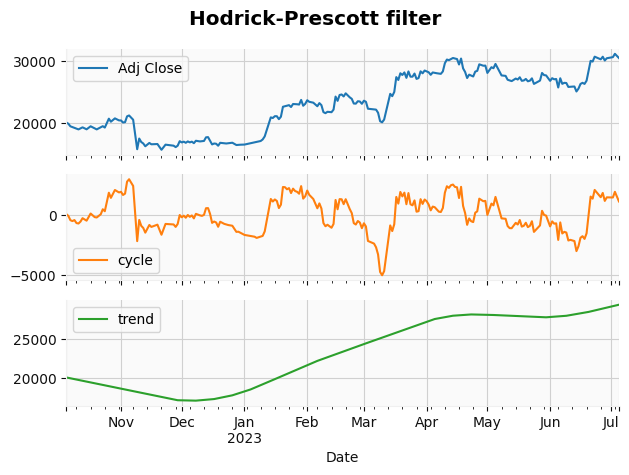

In [11]:
from statsmodels.tsa.filters.hp_filter import hpfilter

hp_df = data[["Adj Close"]].copy()
hp_df["cycle"], hp_df["trend"] = hpfilter(hp_df["Adj Close"], 129600)
hp_df.plot(subplots=True, title="Hodrick-Prescott filter");

sns.despine()
plt.tight_layout()

As you see BTC was finished a down trend in Dec and start new uptrend in Jan, and that trend finished in May , now new uptrend in BTC started at Jul as it was in Jan, expecting to have another 3.5 month uptrend

## Testing for Stationary in time series

Implement:

* Augmented Dickey-Fuller(ADF) test
* Kwiatkowski-philips-Schmidt-Shin (KPSS) test

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

> A unit root is a feature of a time series that makes it non-stationary, meaning that its statistical properties change over time.

> The ADF test is commonly used in econometrics and finance to test for the presence of a trend in a time series dataset. The null hypothesis of the ADF test is that the time series has a unit root, meaning that it is non-stationary.

In [13]:
def adf_test(x):
  indeces = ["Test Statistic", "p-value","# of Lags Used", "# of Observations Used"]

  adf_test = adfuller(x, autolag='AIC')
  results = pd.Series(adf_test[0:4],index = indeces)
  for key, value in adf_test[4].items():
    results[f"Critical Value ({key})"] = value
  return results

In [26]:
adf_test(data['Adj Close'])

Test Statistic             -0.550770
p-value                     0.881723
# of Lags Used              0.000000
# of Observations Used    273.000000
Critical Value (1%)        -3.454533
Critical Value (5%)        -2.872186
Critical Value (10%)       -2.572443
dtype: float64

the p-value in greater than the threshold value (0.05)

In [15]:
def kpss_test(x, h0_type="c"):
 indices = ["Test Statistic", "p-value", "# of Lags"]
 kpss_test = kpss(x, regression=h0_type);
 results = pd.Series(kpss_test[0:3], index=indices)

 for key, value in kpss_test[3].items():
    results[f"Critical Value ({key})"] = value
 return results

In [16]:
kpss_test(data['Adj Close'])

<ipython-input-15-ca4edb5552cd>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(x, regression=h0_type);


Test Statistic            2.179684
p-value                   0.010000
# of Lags                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

* The null hypothesis of the kpss test states that the time series is stationary. With a p-value of 0.01 (less than the threshold 0.05) which rejects the hypothesis => time series is non-stationary


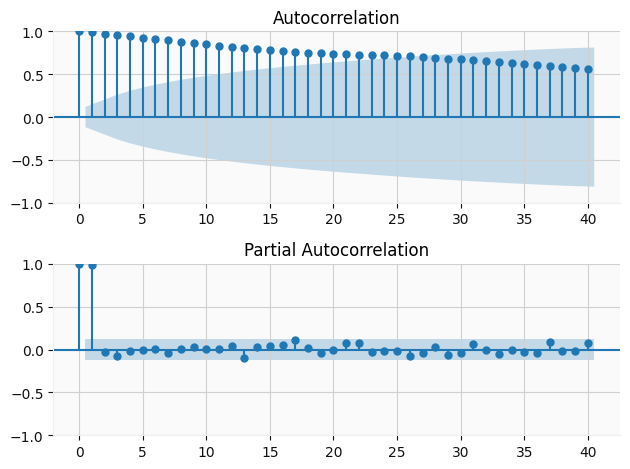

In [34]:
def plot_acf_pacf(data):
    N_LAGS= 40
    SIGNIFICANCE_LEVEL = 0.05

    fig, ax = plt.subplots(2, 1)
    plot_acf(data, ax=ax[0],lags=N_LAGS,
    alpha=SIGNIFICANCE_LEVEL);
    plot_pacf(data, ax=ax[1],lags=N_LAGS,
    alpha=SIGNIFICANCE_LEVEL);

    sns.despine()
    plt.tight_layout()


plot_acf_pacf(data['Adj Close'])

### Zivot Andrews test

In [20]:
from arch.unitroot import ZivotAndrews
za = ZivotAndrews(data['Adj Close'])
print(za.summary().as_text())

        Zivot-Andrews Results        
Test Statistic                 -3.328
P-value                         0.780
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.


## Make time series stationary

Calculating the log-return of the data will make it a stationary

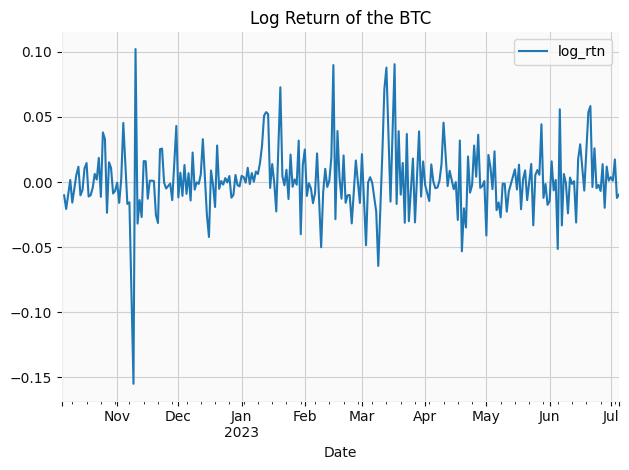

In [22]:
data['log_rtn']=np.log(data['Adj Close']/data['Adj Close'].shift(1))

(
    data.loc[:,['log_rtn']]
    .plot(title='Log Return of the BTC')
)
sns.despine()
plt.tight_layout()

In [30]:
from arch.unitroot import ADF
adf=ADF(data['log_rtn'].dropna())
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -15.835
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [31]:
adf_test(data['log_rtn'].dropna())

Test Statistic           -1.583473e+01
p-value                   9.849377e-29
# of Lags Used            0.000000e+00
# of Observations Used    2.720000e+02
Critical Value (1%)      -3.454622e+00
Critical Value (5%)      -2.872225e+00
Critical Value (10%)     -2.572464e+00
dtype: float64

In [32]:
kpss_test(data['log_rtn'].dropna())

Test Statistic           0.113228
p-value                  0.100000
# of Lags                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

## Modeling time series with exponential smoothing methods

In [ ]:
from statsmodels.tsa.holtwinters import (ExponentialSmoothing,
                                         SimpleExpSmoothing,
                                         Holt)